In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
#Загрузка первого датасета
data1=pd.read_excel('X_bp.xlsx')
data1.head(10)


,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0
5,5.0,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0
6,6.0,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0
7,7.0,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.0,1800.0,120.0
8,8.0,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.0,1800.0,120.0
9,9.0,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.0,2000.0,300.0


In [7]:
data1.shape

(1023, 11)

In [8]:
#Удаление неинформативного столбца
data1.drop(['Unnamed: 0'],axis=1,inplace=True)
data1.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [9]:
#Загрузка второго датасета
data2=pd.read_excel('X_nup.xlsx')
data2.head(10)

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.0,57.0
1,1.0,0.0,4.0,60.0
2,2.0,0.0,4.0,70.0
3,3.0,0.0,5.0,47.0
4,4.0,0.0,5.0,57.0
5,5.0,0.0,5.0,60.0
6,6.0,0.0,5.0,70.0
7,7.0,0.0,7.0,47.0
8,8.0,0.0,7.0,57.0
9,9.0,0.0,7.0,60.0


In [10]:
#Удаление неинформативного столбца
data2.drop(['Unnamed: 0'], axis=1,inplace=True)
data2.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,4.0,57.0
1,0.0,4.0,60.0
2,0.0,4.0,70.0
3,0.0,5.0,47.0
4,0.0,5.0,57.0


In [11]:
#Объединение двух датасетов в один
dataset=data1.merge(data2,left_index=True,right_index=True,how='inner')
dataset.head().T

,0,1,2,3,4
Соотношение матрица-наполнитель,1.857143,1.857143,1.857143,1.857143,2.771331
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
"модуль упругости, ГПа",738.736842,738.736842,738.736842,738.736842,753.000000
"Количество отвердителя, м.%",30.000000,50.000000,49.900000,129.000000,111.860000
"Содержание эпоксидных групп,%_2",22.267857,23.750000,33.000000,21.250000,22.267857
"Температура вспышки, С_2",100.000000,284.615385,284.615385,300.000000,284.615385
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000


In [12]:
dataset.shape

(1023, 13)

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


In [14]:
#Проверка на пропущенные данные
dataset.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [15]:
#Проверка на повторяющиеся значения
dataset.duplicated().sum()

0

In [23]:
# Поиск корреляционной зависимости (коэффициент корреляции Спирмена)
dataset.corr(method='spearman')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,-0.005542,0.031823,0.002496,0.016358,-0.013635,-0.003896,-0.006459,0.017554,0.054084,-0.026190,0.032510,0.004570
"Плотность, кг/м3",-0.005542,1.000000,-0.010097,-0.032907,-0.012287,-0.030447,0.055071,-0.032446,-0.069816,-0.025729,-0.063073,-0.045941,0.080001
"модуль упругости, ГПа",0.031823,-0.010097,1.000000,0.033397,0.002016,0.031247,-0.001318,0.007705,0.033750,0.008010,-0.038800,-0.011851,0.072628
"Количество отвердителя, м.%",0.002496,-0.032907,0.033397,1.000000,-0.001652,0.086970,0.050751,-0.064127,-0.067707,-0.006371,0.030222,0.008440,0.025265
"Содержание эпоксидных групп,%_2",0.016358,-0.012287,0.002016,-0.001652,1.000000,-0.003641,-0.011232,0.061930,-0.019193,0.014230,0.005714,-0.007421,-0.032182
"Температура вспышки, С_2",-0.013635,-0.030447,0.031247,0.086970,-0.003641,1.000000,0.025441,0.024625,-0.028283,0.051763,0.021886,0.043075,0.008160
"Поверхностная плотность, г/м2",-0.003896,0.055071,-0.001318,0.050751,-0.011232,0.025441,1.000000,0.035319,-0.008221,-0.005344,0.055637,0.037675,-0.032404
"Модуль упругости при растяжении, ГПа",-0.006459,-0.032446,0.007705,-0.064127,0.061930,0.024625,0.035319,1.000000,-0.009970,0.052450,0.027458,-0.014210,-0.003225
"Прочность при растяжении, МПа",0.017554,-0.069816,0.033750,-0.067707,-0.019193,-0.028283,-0.008221,-0.009970,1.000000,0.020831,0.025226,-0.071915,0.014950
"Потребление смолы, г/м2",0.054084,-0.025729,0.008010,-0.006371,0.014230,0.051763,-0.005344,0.052450,0.020831,1.000000,-0.002940,0.009288,0.016236


array([[<AxesSubplot:title={'center':'Соотношение матрица-наполнитель'}>,
        <AxesSubplot:title={'center':'Плотность, кг/м3'}>,
        <AxesSubplot:title={'center':'модуль упругости, ГПа'}>,
        <AxesSubplot:title={'center':'Количество отвердителя, м.%'}>],
       [<AxesSubplot:title={'center':'Содержание эпоксидных групп,%_2'}>,
        <AxesSubplot:title={'center':'Температура вспышки, С_2'}>,
        <AxesSubplot:title={'center':'Поверхностная плотность, г/м2'}>,
        <AxesSubplot:title={'center':'Модуль упругости при растяжении, ГПа'}>],
       [<AxesSubplot:title={'center':'Прочность при растяжении, МПа'}>,
        <AxesSubplot:title={'center':'Потребление смолы, г/м2'}>,
        <AxesSubplot:title={'center':'Угол нашивки, град'}>,
        <AxesSubplot:title={'center':'Шаг нашивки'}>],
       [<AxesSubplot:title={'center':'Плотность нашивки'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

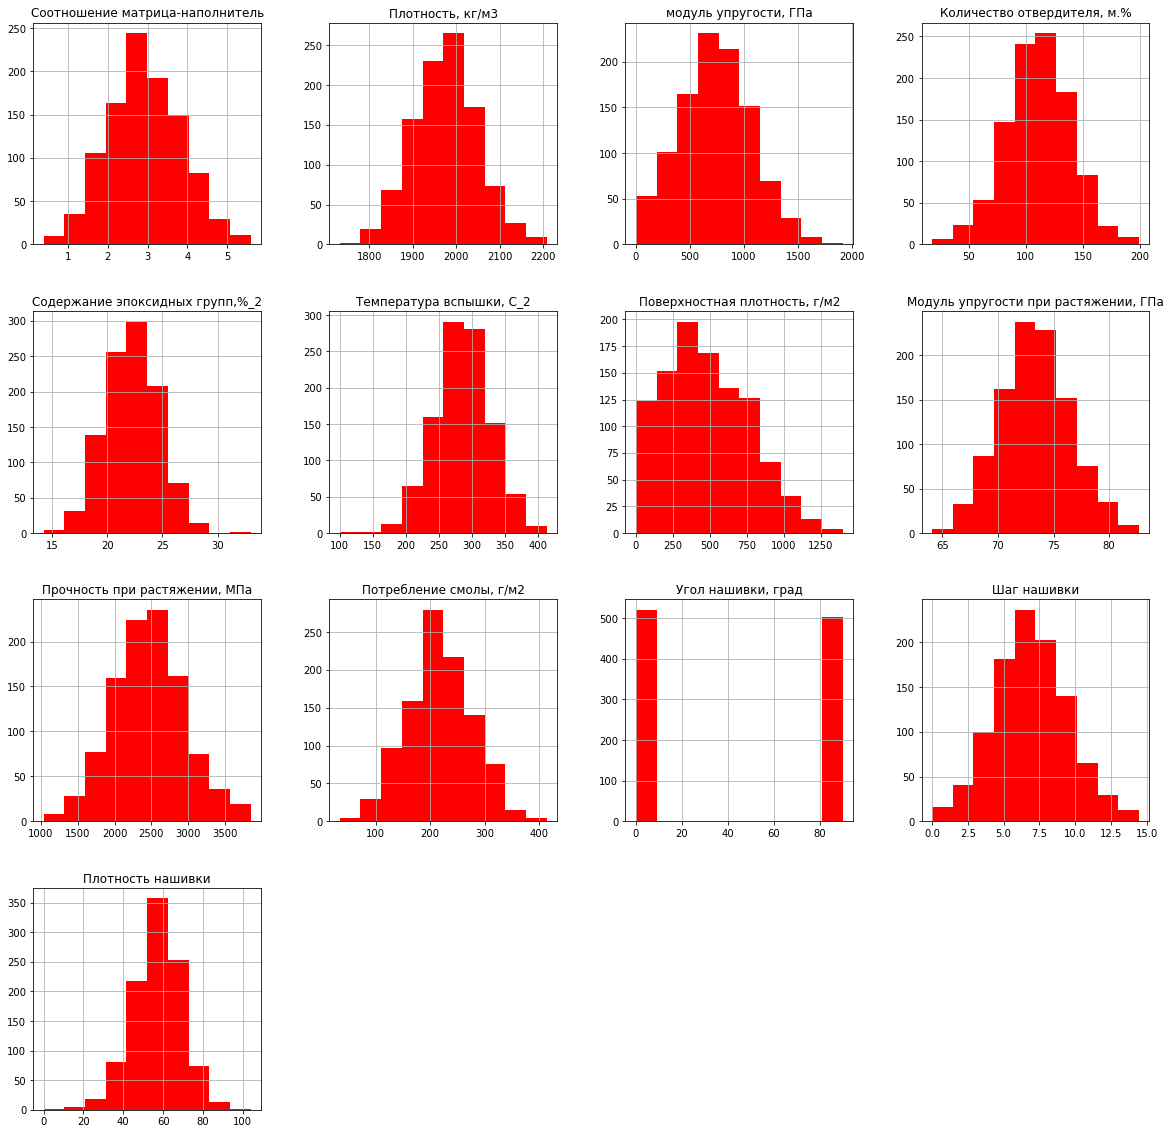

In [17]:
dataset.hist(figsize=(20,20), color="r")

In [18]:
#Нормализация данных
minmax_scaler=MinMaxScaler()
data_norm=minmax_scaler.fit_transform(np.array(dataset[['Соотношение матрица-наполнитель','Плотность, кг/м3',
                                                        'модуль упругости, ГПа','Количество отвердителя, м.%',
                                                        'Содержание эпоксидных групп,%_2','Температура вспышки, С_2',
                                                        'Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа',
                                                        'Прочность при растяжении, МПа','Потребление смолы, г/м2',
                                                        'Угол нашивки, град','Шаг нашивки','Плотность нашивки']]))
data_norm

array([[0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.54813542],
       [0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.57698465],
       [0.28213084, 0.62653324, 0.38567917, ..., 0.        , 0.2769983 ,
        0.67314876],
       ...,
       [0.55575038, 0.50547008, 0.21706548, ..., 1.        , 0.28815814,
        0.65035483],
       [0.63739572, 0.70384225, 0.38711371, ..., 1.        , 0.43718647,
        0.56026242],
       [0.65713085, 0.33328967, 0.21731676, ..., 1.        , 0.42096135,
        0.74464166]])

In [19]:
data_norm_df=pd.DataFrame(data_norm, columns=['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки'])
data_norm_df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135


array([[<AxesSubplot:title={'center':'Соотношение матрица-наполнитель'}>,
        <AxesSubplot:title={'center':'Плотность, кг/м3'}>,
        <AxesSubplot:title={'center':'модуль упругости, ГПа'}>,
        <AxesSubplot:title={'center':'Количество отвердителя, м.%'}>],
       [<AxesSubplot:title={'center':'Содержание эпоксидных групп,%_2'}>,
        <AxesSubplot:title={'center':'Температура вспышки, С_2'}>,
        <AxesSubplot:title={'center':'Поверхностная плотность, г/м2'}>,
        <AxesSubplot:title={'center':'Модуль упругости при растяжении, ГПа'}>],
       [<AxesSubplot:title={'center':'Прочность при растяжении, МПа'}>,
        <AxesSubplot:title={'center':'Потребление смолы, г/м2'}>,
        <AxesSubplot:title={'center':'Угол нашивки, град'}>,
        <AxesSubplot:title={'center':'Шаг нашивки'}>],
       [<AxesSubplot:title={'center':'Плотность нашивки'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

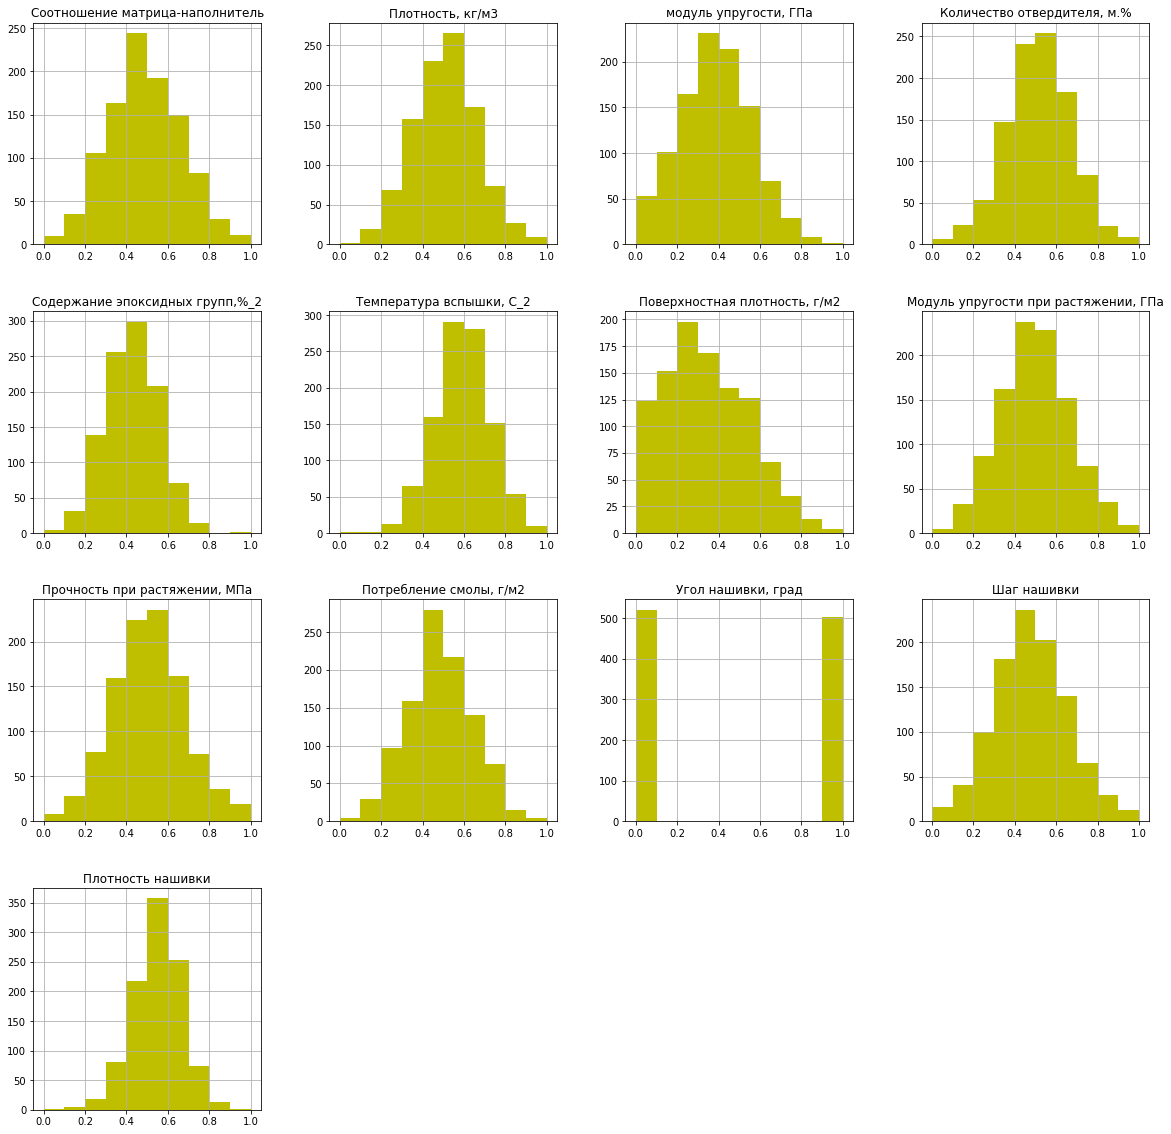

In [21]:
data_norm_df.hist(figsize=(20,20), color="y")

In [20]:
#Стандартизация данных
std_scaler=StandardScaler()
dataset_std=std_scaler.fit_transform(np.array(dataset[['Соотношение матрица-наполнитель','Плотность, кг/м3',
                                                       'модуль упругости, ГПа','Количество отвердителя, м.%',
                                                       'Содержание эпоксидных групп,%_2','Температура вспышки, С_2',
                                                       'Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа',
                                                       'Прочность при растяжении, МПа','Потребление смолы, г/м2',
                                                       'Угол нашивки, град','Шаг нашивки','Плотность нашивки']]))
dataset_std[:1]

array([[-1.17577935e+00,  7.36365394e-01, -3.59435925e-03,
        -2.84882775e+00,  9.75732905e-03, -4.54221451e+00,
        -9.69964386e-01, -1.06771965e+00,  1.09824369e+00,
         2.64100277e-02, -9.83518018e-01, -1.13153009e+00,
        -1.24690399e-02]])

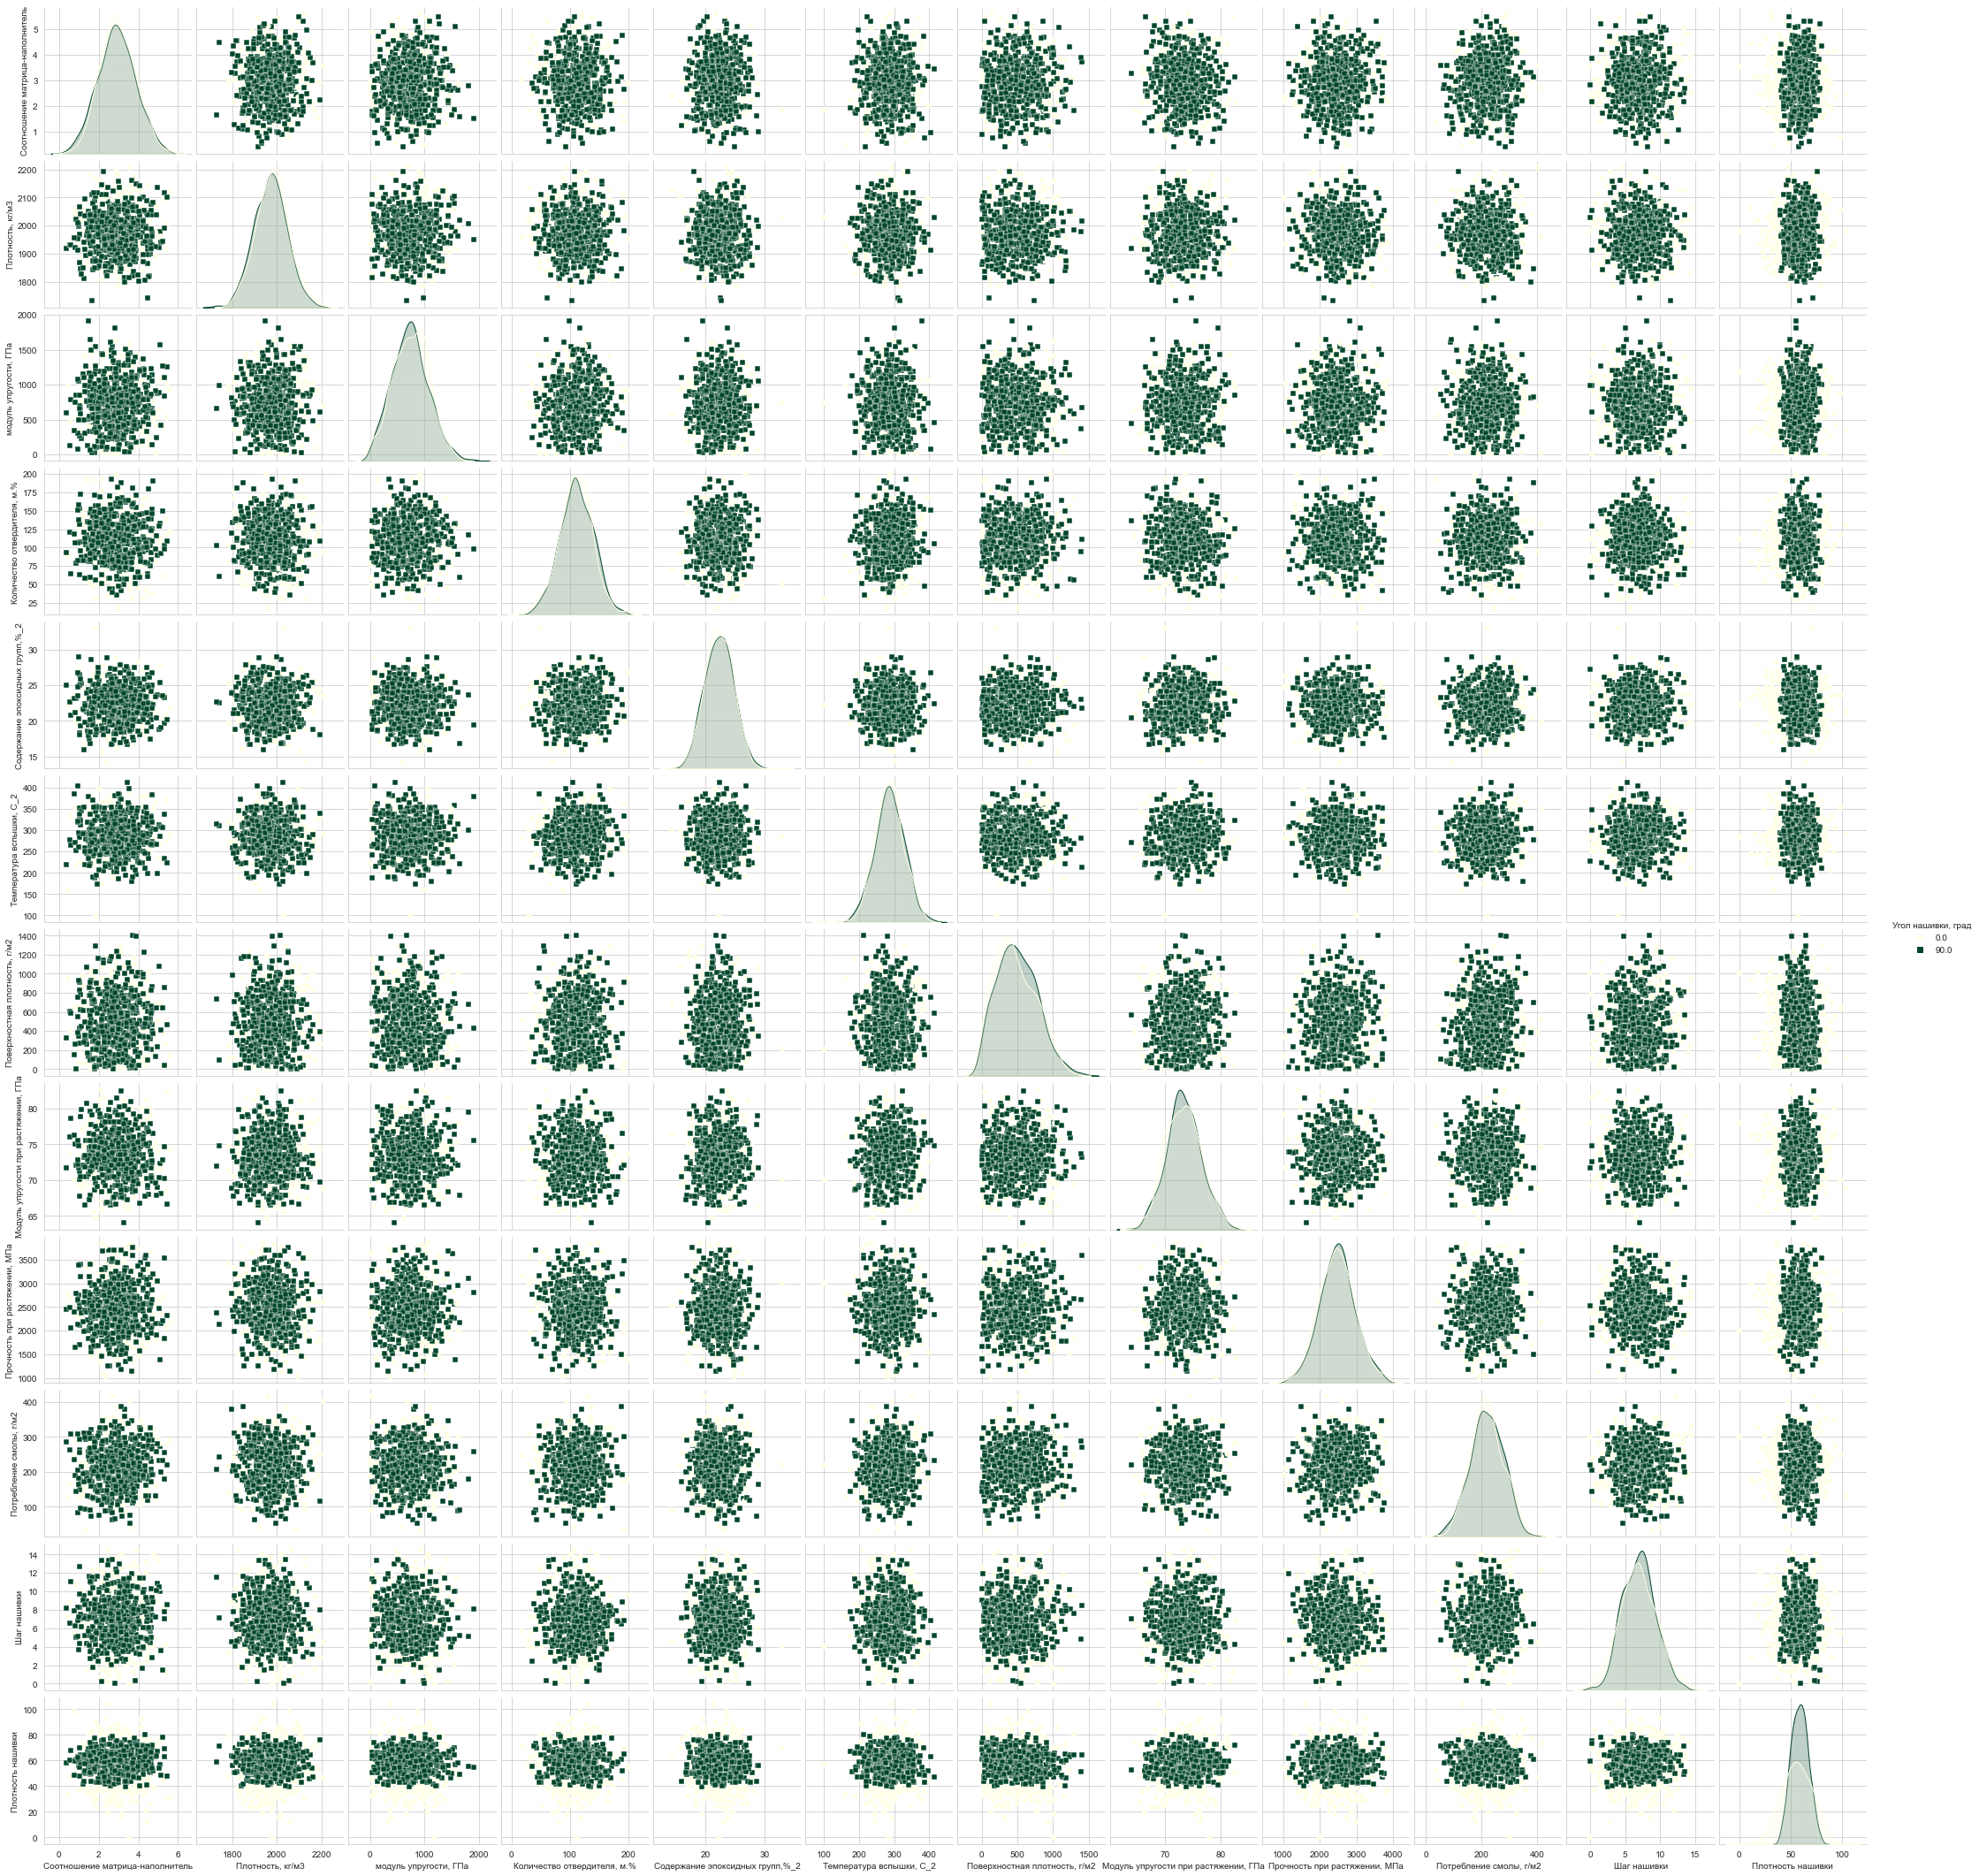

In [22]:
# Попарные графики рассеяния точек (матрица диаграмм рассеяния)
sns.set_style('whitegrid')
sns.pairplot(dataset, hue = 'Угол нашивки, град', markers = ["o", "s"], diag_kind = 'auto', palette='YlGn')

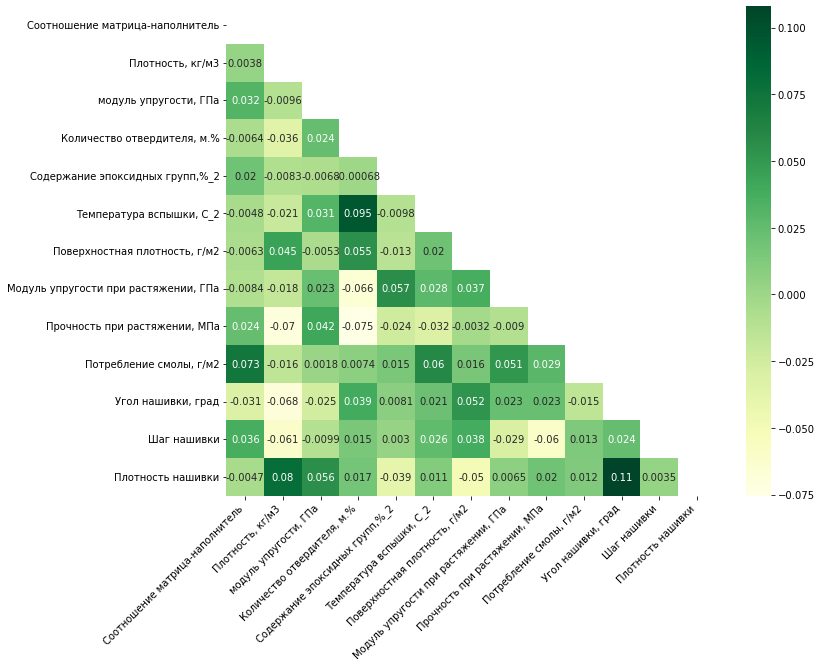

In [24]:
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(dataset.corr(), mask = np.triu(dataset.corr()), annot = True, square = True, cmap = 'YlGn')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [24]:
dataset.to_excel('General.xlsx')